In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = "movies_data.csv"

In [3]:
df = pd.read_csv(movies)

In [4]:
df.head()

,Title,Budget,Gross,IMDb Rating,Metascore,Reviews,Likes,Success/Flop
0,Fast X,340000000,676000000,7.349,7.349,1719,11393.514,Success
1,John Wick: Chapter 4,90000000,431769198,7.906,7.906,3083,3761.669,Success
2,The Super Mario Bros. Movie,100000000,1308766975,7.808,7.808,4864,3163.738,Success
3,Spider-Man: Across the Spider-Verse,100000000,494002979,8.700,8.700,1455,2616.839,Success
4,Transformers: Rise of the Beasts,200000000,227045464,7.275,7.275,329,2097.734,Success


In [5]:
df.shape

(4640, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         4640 non-null   object 
 1   Budget        4640 non-null   int64  
 2   Gross         4640 non-null   int64  
 3   IMDb Rating   4640 non-null   float64
 4   Metascore     4640 non-null   float64
 5   Reviews       4640 non-null   int64  
 6   Likes         4640 non-null   float64
 7   Success/Flop  4640 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 290.1+ KB


## Necessary Data Cleaning

In [7]:
df.drop(labels=["Title","Gross","IMDb Rating","Budget"],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Metascore     4640 non-null   float64
 1   Reviews       4640 non-null   int64  
 2   Likes         4640 non-null   float64
 3   Success/Flop  4640 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 145.1+ KB


### Handling Null values and Duplicate Data

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Metascore       0
Reviews         0
Likes           0
Success/Flop    0
dtype: int64

In [11]:
Numerical_col=df.select_dtypes(include=["int64","float64"])
no_of_numerical_col=len(Numerical_col.columns)
print(Numerical_col.columns)
print("Numerical Columns :",no_of_numerical_col)

Index(['Metascore', 'Reviews', 'Likes'], dtype='object')
Numerical Columns : 3


In [12]:
# Replaced median from the numerical columns

numerical_columns = df.select_dtypes(include=['float64','int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

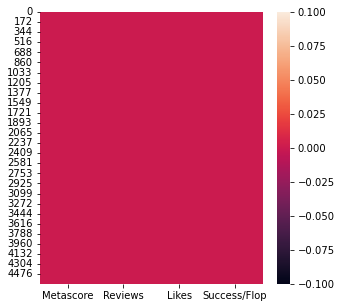

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.show()

## Formating data as per requirement

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4636 entries, 0 to 4639
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Metascore     4636 non-null   float64
 1   Reviews       4636 non-null   int64  
 2   Likes         4636 non-null   float64
 3   Success/Flop  4636 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 181.1+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4636 entries, 0 to 4639
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Metascore     4636 non-null   float64
 1   Reviews       4636 non-null   int64  
 2   Likes         4636 non-null   float64
 3   Success/Flop  4636 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 181.1+ KB


In [16]:
df.head()

,Metascore,Reviews,Likes,Success/Flop
0,7.349,1719,11393.514,Success
1,7.906,3083,3761.669,Success
2,7.808,4864,3163.738,Success
3,8.700,1455,2616.839,Success
4,7.275,329,2097.734,Success


## Budget outlier

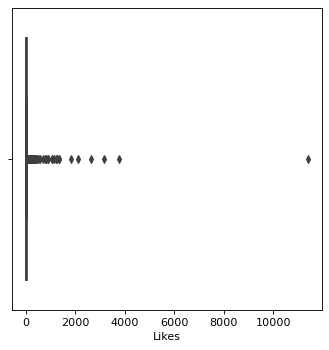

In [17]:
plt.figure(figsize=(5,5),dpi=80)
sns.boxplot(x=df["Likes"])
plt.show()

In [18]:
df["Success/Flop"] = df["Success/Flop"].map({"Flop": 0, "Success": 1})

In [19]:
df

,Metascore,Reviews,Likes,Success/Flop
0,7.349,1719,11393.514,1
1,7.906,3083,3761.669,1
2,7.808,4864,3163.738,1
3,8.700,1455,2616.839,1
4,7.275,329,2097.734,1
...,...,...,...,...
4635,6.262,909,11.689,0
4636,5.462,78,11.524,0
4637,7.094,1349,8.696,0
4638,6.699,472,14.933,0


In [20]:
df1 = df.to_csv('updated_movie_data.csv', index=False)

In [21]:
df

,Metascore,Reviews,Likes,Success/Flop
0,7.349,1719,11393.514,1
1,7.906,3083,3761.669,1
2,7.808,4864,3163.738,1
3,8.700,1455,2616.839,1
4,7.275,329,2097.734,1
...,...,...,...,...
4635,6.262,909,11.689,0
4636,5.462,78,11.524,0
4637,7.094,1349,8.696,0
4638,6.699,472,14.933,0


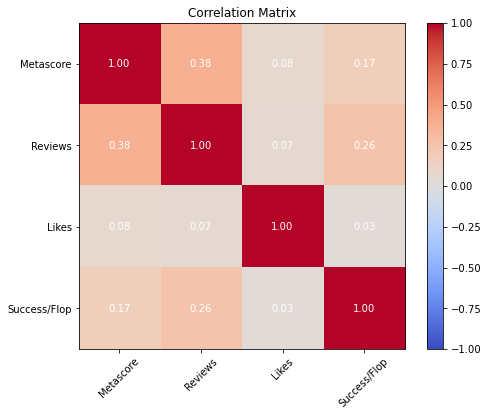

In [22]:


# Assuming you have a pandas DataFrame called 'df' containing the data

# Create a subset of the DataFrame with the relevant columns
subset = df[['Metascore', 'Reviews', 'Likes', 'Success/Flop']]

# Compute the correlation matrix
corr_matrix = subset.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix')
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(heatmap)

# Set the tick labels and rotation
plt.xticks(range(len(subset.columns)), subset.columns, rotation=45)
plt.yticks(range(len(subset.columns)), subset.columns)

# Display the correlation values as annotations
for i in range(len(subset.columns)):
    for j in range(len(subset.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.show()


In [23]:
x = df.drop(["Success/Flop"], axis=1)
y = df["Success/Flop"]

In [24]:
x

,Metascore,Reviews,Likes
0,7.349,1719,11393.514
1,7.906,3083,3761.669
2,7.808,4864,3163.738
3,8.700,1455,2616.839
4,7.275,329,2097.734
...,...,...,...
4635,6.262,909,11.689
4636,5.462,78,11.524
4637,7.094,1349,8.696
4638,6.699,472,14.933


In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4635    0
4636    0
4637    0
4638    0
4639    1
Name: Success/Flop, Length: 4636, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)


In [28]:

# Assuming you have your test feature data in the variable 'test_x' and test target data in the variable 'test_y'

# Create a DataFrame to hold the test data
test_data = pd.DataFrame(data=test_x, columns=['Metascore', 'Reviews', 'Likes'])
test_data['Success/Flop'] = test_y  # Add the target column to the DataFrame

# Store the test data in a CSV file
test_data.to_csv('test_data.csv', index=False)


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model=RandomForestClassifier()

In [31]:
model.fit(train_x,train_y)

RandomForestClassifier()

In [32]:
model.score(test_x,test_y)

0.7828900071890726

In [33]:
y_prediction=model.predict(test_x)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(test_y,y_prediction)

0.7828900071890726

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [40]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 3, verbose=2, random_state=40, n_jobs=1)

In [41]:
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   4.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   4.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   4.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   1.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_esti

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=5, n_estimators=1200)

In [43]:
y1=rf_random.predict(test_x)

In [44]:
accuracy_score(test_y,y1)

0.7958303378864127

In [45]:
import pickle

In [46]:
with open('C:/Users/anujs/CODEBASE/server/model/rfa.pckl', 'wb') as rfa_file:
    pickle.dump(model, rfa_file)
    rfa_file.close()

In [47]:
with open('C:/Users/anujs/CODEBASE/server/model/rfa.pckl','rb') as rfa_file:
    model=pickle.load(rfa_file)

In [48]:
y_pred = model.predict(test_x)
accuracy = accuracy_score(test_y, y1)
print("Accuracy:", accuracy)

Accuracy: 0.7958303378864127


In [49]:
import pickle

# Assuming your trained model is saved in a file named 'model.pkl'
with open('model/rfa.pckl', 'rb') as file:
    model1 = pickle.load(file)


In [52]:

# Get input from the user
metascore = float(input("Enter the Metascore: "))
reviews = float(input("Enter the Reviews: "))
likes = float(input("Enter the Likes: "))

# Create a DataFrame with the user input
input_data = pd.DataFrame({'Metascore': [metascore], 'Reviews': [reviews], 'Likes': [likes]})

# Make predictions using the loaded model
predictions = model1.predict(input_data)

# Print the predicted value
print("Prediction:", predictions[0])



Enter the Metascore: 7
Enter the Reviews: 100
Enter the Likes: 100
Prediction: 0


In [51]:
test_features = test_data[['Metascore', 'Reviews', 'Likes']]  # Extract the test features from the DataFrame
